<a href="https://colab.research.google.com/github/bele99/Project/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature selection

## 1.Missing values

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### ALL the techniques of handing for missing values
1. Mean/Median/Mode replacement
2. Random sample imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

### 1) Mean/Median/Mode

In [ ]:
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)
print("Find the percentage of null values:", df['cabin_null'].mean())

Find the percentage of null values: 0.7710437710437711


In [ ]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [ ]:
# use the median mothed for "Age"
df_median = df.Age.median()
df_median

28.0

In [ ]:
df['Age_median'] = df['Age'].fillna(df_median)
df[df['Age'].isnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,28.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,28.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1,28.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,28.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1,28.0


In [ ]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


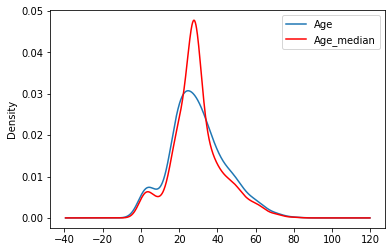

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

**Advantages And Disadvantages of Mean/Median Imputation**

**Advantages**

* Easy to implement(Robust to outliers)
* Faster way to obtain the complete dataset

**Disadvantages**

* Change or Distortion in the original variance
* Impacts Correlation

### 2) Random sample imputation

In [ ]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [ ]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=1)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [ ]:
median=df.Age.median()
impute_nan(df,"Age",median)
df[df['Age'].isnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median,Age_random
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,28.0,15.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,28.0,7.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1,28.0,33.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,28.0,14.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1,28.0,21.0


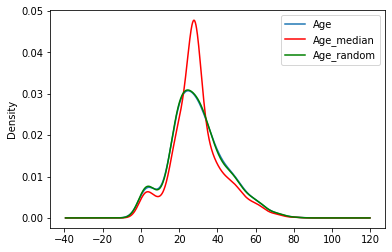

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax,)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

**Advantages**

* Easy To implement
* There is less distortion in variance

**Disadvantage**

* Every situation randomness wont work

### 3) Capturing NAN values with a new feature

In [ ]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median,Age_random,Age_NAN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,22.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,35.0,0


**Advantages**

* Easy to implement
* Captures the importance of missing values

**Disadvantages**

* Creating Additional Features(Curse of Dimensionality)

### 4) End of distribution imputation

<Axes: >

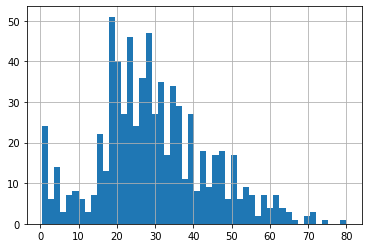

In [ ]:
df.Age.hist(bins=50)

<Axes: xlabel='Age'>

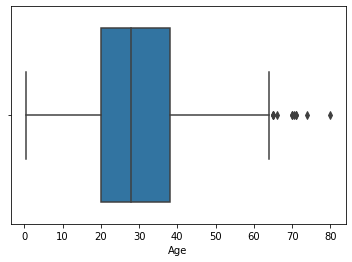

In [ ]:
sns.boxplot(x=df['Age'])

In [ ]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406094

In [ ]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [ ]:
impute_nan(df,'Age',df.Age.median(),extreme)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median,Age_random,Age_NAN,Age_end_distribution
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,22.0,0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,38.0,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0,26.0,0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,35.0,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,35.0,0,35.0


<Axes: >

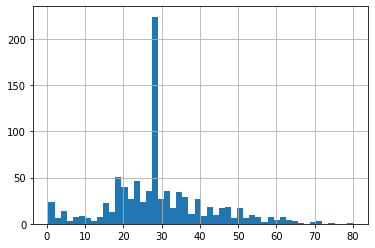

In [ ]:
df['Age'].hist(bins=50)

<Axes: >

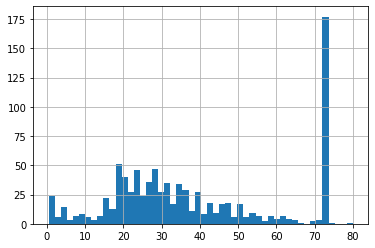

In [ ]:
df['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age_end_distribution'>

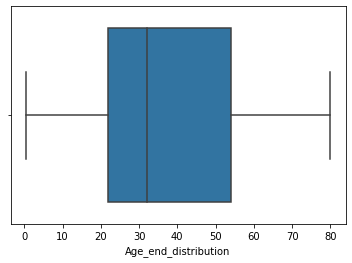

In [ ]:
sns.boxplot(x=df['Age_end_distribution'])

**Advantages**

* Easy to implement

**Disadvantages**


### 5) Arbitratry imputation

This technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [ ]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

impute_nan(df,'Age')

<Axes: >

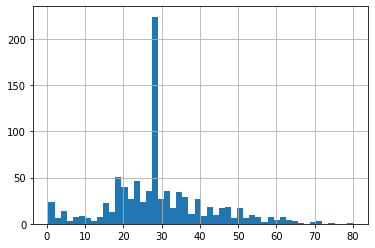

In [ ]:
df['Age_hundred'].hist(bins=50)

<Axes: xlabel='Age_hundred'>

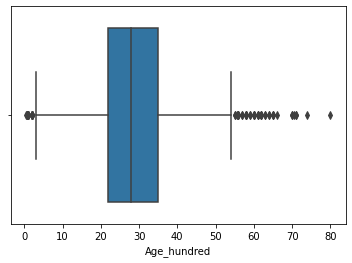

In [ ]:
sns.boxplot(x=df['Age_hundred'])

**Advantages**

* Easy to implement
* Captures the importance of missingess if there is one

**Disadvantages**

* Distorts the original distribution of the variable
* If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
* Hard to decide which value to use

### 6) Handling Categroical missing values

Frequent category imputation

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median,Age_random,Age_NAN,Age_end_distribution,Age_zero,Age_hundred
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,22.0,0,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,38.0,0,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0,26.0,0,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,35.0,0,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,35.0,0,35.0,35.0,35.0


In [ ]:
df.isnull().sum()

PassengerId               0
Survived                  0
Pclass                    0
Name                      0
Sex                       0
Age                       0
SibSp                     0
Parch                     0
Ticket                    0
Fare                      0
Cabin                   687
Embarked                  2
cabin_null                0
Age_median                0
Age_random                0
Age_NAN                   0
Age_end_distribution      0
Age_zero                  0
Age_hundred               0
dtype: int64

<Axes: >

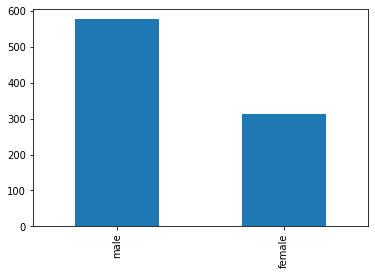

In [ ]:
df['Sex'].value_counts().plot.bar()

In [ ]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

for feature in ['Sex']:
    impute_nan(df,feature)

**Advantages**

* Easy To implement
* Fater way to implement

**Disadvantages**

* Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
* It distorts the relation of the most frequent label

if you have more frequent categories, we just replace NAN with a new category

In [ ]:
def impute_nan(df,variable):
  most_frequent_category=df[variable].mode()[0]
  df[variable+"newvar"]=np.where(df[variable].isnull(),most_frequent_category,df[variable])

for feature in ['Sex','xxx','zzz']:
    impute_nan(df,feature)

df=df.drop(['Sex','xxx','zzz'],axis=1)

## 2.Handing categorical feature

### 1) One Hot Encoding

In [ ]:
df = pd.read_csv('titanic.csv')

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
pd.get_dummies(df['Sex'],drop_first=True).head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
pd.get_dummies(df['Embarked'],drop_first=True).head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


?? one hot encoding with many categories in a feature

### 2) Ordinal Number Encoding

In [ ]:
data_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
data_set.head()  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
columns=[1,3,5,6,7,8,9,13]
train_set = data_set[columns]
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [ ]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [ ]:
# By count
country_map=train_set['Country'].value_counts().to_dict()
train_set['Country']=train_set['Country'].map(country_map)
train_set.head(10)

<ipython-input-57-018bc120aaf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Country']=train_set['Country'].map(country_map)


,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


In [ ]:
ordinal_labels = train_set.Employment.unique()
# You can sort it by counting, frequency, mean

In [ ]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{' State-gov': 0,
 ' Self-emp-not-inc': 1,
 ' Private': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' ?': 5,
 ' Self-emp-inc': 6,
 ' Without-pay': 7,
 ' Never-worked': 8}

In [ ]:
train_set['Employment_ordinal_labels']=train_set['Employment'].map(ordinal_labels2)
train_set.head()

<ipython-input-64-4a7878f79005>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Employment_ordinal_labels']=train_set['Employment'].map(ordinal_labels2)


,Employment,Degree,Status,Designation,family_job,Race,Sex,Country,Employment_ordinal_labels
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170,1
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170,2
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170,2
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95,2


### 3) Probability Ration Encoding

In [ ]:
df=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
### Replacing
df['Cabin'].fillna('Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [ ]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [ ]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [ ]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()
prob_df=pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [ ]:
prob_df['Died']=1-prob_df['Survived']
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [ ]:
prob_df['Probability_ratio']=prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [ ]:
probability_encoded=prob_df['Probability_ratio'].to_dict()
df['Cabin_encoded']=df['Cabin'].map(probability_encoded)
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


## 3.Handling Datetime

In [ ]:
import datetime

In [ ]:
today_date=datetime.datetime.today()
today_date

datetime.datetime(2023, 3, 22, 2, 26, 35, 833451)

In [ ]:
today_date-datetime.timedelta(3)

datetime.datetime(2023, 3, 19, 2, 26, 35, 833451)

In [ ]:
#### List Comprehension
days=[today_date-datetime.timedelta(x) for x in range(0,15)]

In [ ]:
data=pd.DataFrame(days)
data.columns=["Day"]
data.head()

,Day
0,2023-03-22 02:26:35.833451
1,2023-03-21 02:26:35.833451
2,2023-03-20 02:26:35.833451
3,2023-03-19 02:26:35.833451
4,2023-03-18 02:26:35.833451


In [ ]:
data['weekday']=data['Day'].dt.weekday
data.head()

,Day,weekday
0,2023-03-22 02:26:35.833451,2
1,2023-03-21 02:26:35.833451,1
2,2023-03-20 02:26:35.833451,0
3,2023-03-19 02:26:35.833451,6
4,2023-03-18 02:26:35.833451,5


In [ ]:
dictionary={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
dictionary

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [ ]:
data['weekday_ordinal']=data['weekday'].map(dictionary)
data.head()

,Day,weekday,weekday_ordinal
0,2023-03-22 02:26:35.833451,2,Wednesday
1,2023-03-21 02:26:35.833451,1,Tuesday
2,2023-03-20 02:26:35.833451,0,Monday
3,2023-03-19 02:26:35.833451,6,Sunday
4,2023-03-18 02:26:35.833451,5,Saturday


# Transformation of Features

**Why Transformation of Features Are Required?**

* Linear Regression---Gradient Descent ----Global Minima
* Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance

Every Point has some vectors and Directiom

**Deep Learning Techniques(Standardization, Scaling)**

* 1.ANN--->GLobal Minima, Gradient 
* 2.CNN 
* 3.RNN

0-255 pixels

## 1) Standardization

In [ ]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [ ]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [ ]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
### fit vs fit_transform
df_scaled=scaler.fit_transform(df)

<Axes: ylabel='Count'>

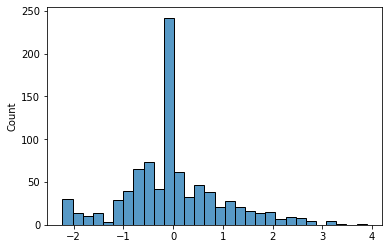

In [ ]:
# 0: Survived, 1: Pclass, 2: Age, 3:Fare
sns.histplot(df_scaled[:,2], bins=30)

## 2) Min Max Scaling

(### CNN)---Deep Learning Techniques

Min Max Scaling scales the values between 0 to 1. 

**X_scaled = (X - X.min / (X.max - X.min)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


<Axes: xlabel='Age', ylabel='Count'>

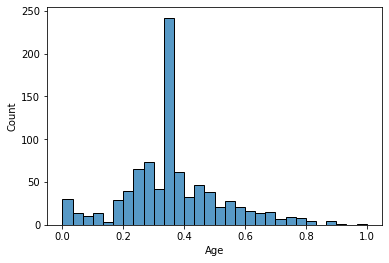

In [ ]:
sns.histplot(df_minmax['Age'])

## 3) Robust Scaler

It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

**IQR = 75th quantile - 25th quantile**

**X_scaled = (X - X.median) / IQR**

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


<Axes: xlabel='Age', ylabel='Count'>

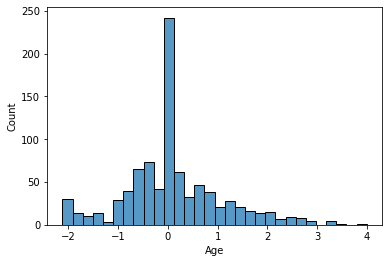

In [ ]:
sns.histplot(df_robust_scaler['Age'])

##4) Guassion Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

* logarithmic transformation
* reciprocal transformation
* square root transformation
* exponential transformation (more general, you can use any exponent)
* boxcox transformation

In [ ]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
### fillnan
df['Age']=df['Age'].fillna(df['Age'].median())
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [ ]:
import scipy.stats as stat
import pylab 

In [ ]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

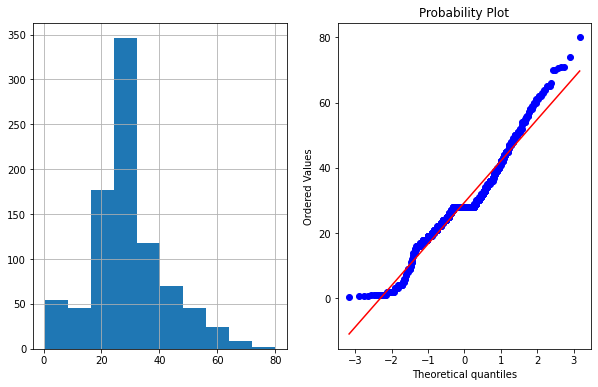

In [ ]:
plot_data(df,'Age')

### 1> Logarithmic Transformation

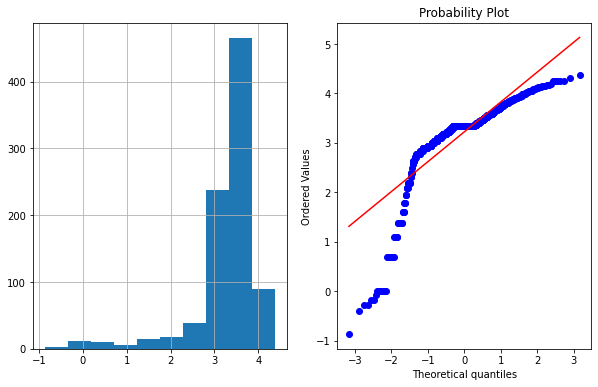

In [ ]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

### 2> Reciprocal Transformation

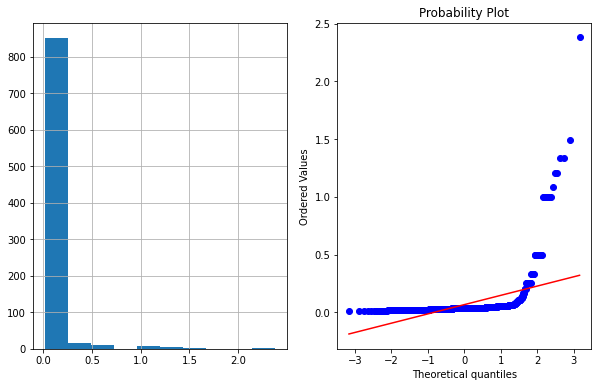

In [ ]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

### 3> Square Root Transformation

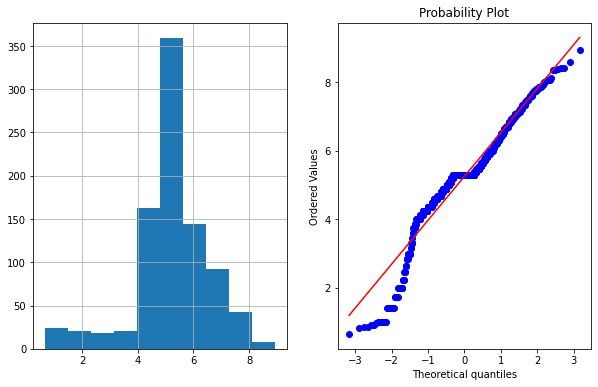

In [ ]:
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

### 4> Exponential Transformation

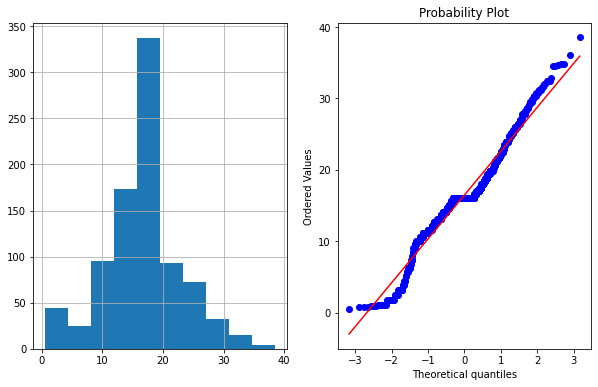

In [ ]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

### 5> BoxCox Transformation

The Box-Cox transformation is defined as:

**T(Y)=(Y exp(λ)−1)/λ**

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [ ]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])
print(parameters)

0.7964531473656952


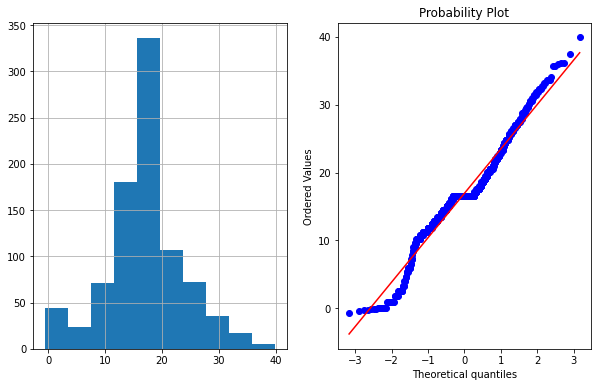

In [ ]:
plot_data(df,'Age_Boxcox')

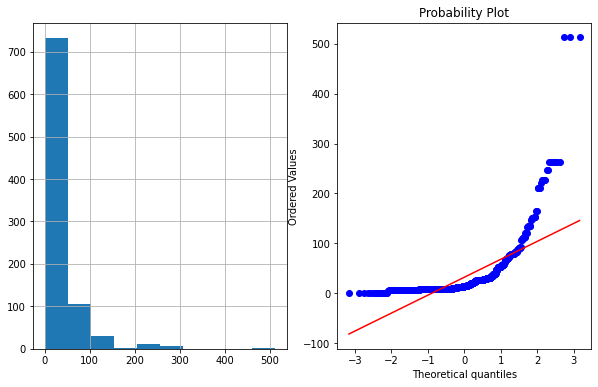

In [ ]:
# orginal
plot_data(df,'Fare')

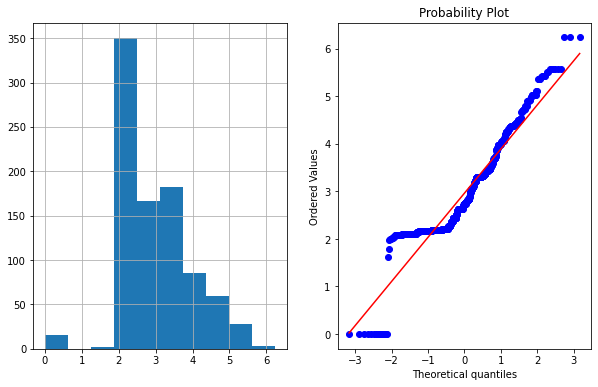

In [ ]:
# ????
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

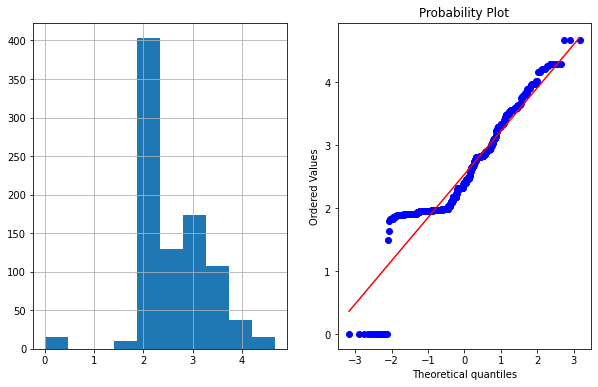

In [ ]:
#BoxCox transformation
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_Boxcox')

## 1. variance threshold

## 2. Correlation

## 3. information Gain for classification

## 4. information Gain for regression

## 5.ChiSquare test statistical analysis